## Web Scraping and Analysis using Python

#### Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have. Let's say you find data from the web, and there is no direct way to download it, web scraping using Python is a skill you can use to extract the data into a useful form that can be imported.

##### The most common technique for Data Scraping is using BeautifulSoup. Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to interact with a web page using developer tools. Beautiful Soup exposes a couple of intuitive functions which can use to explore the HTML. 

##### Here are the following steps which will be performed during Web Scraping and EDA:

- Data extraction from the web using Python's Beautiful Soup module
- Data manipulation and cleaning using Python's Pandas library
- Data visualization using Python's Matplotlib and seaborn library

##### Here the aim is to find out the best Water Bottle product from flipkat based by considering on user input criteria like budget amount, ratings, and Capacity. And the data want to display based on discount price descending and Rating Ascending order.   


In [1]:
#import Libraries
import requests, bs4
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import missingno as mino
import re    
from fake_useragent import UserAgent

In [1]:
# Give the input search criteria of the product which user is looking
product=input('Please enter the product name which you want to search: ')
print('\n Please enter your Budget -')
Min_price=int(input("Start Range: "))
Max_price=int(input("End Range: "))
input_Rating=float(input("Enter Rating: "))
bottile_capacity=int(input("Bottle Capacity: "))

Please enter the product name which you want to search: bottle

 Please enter your Budget -
Start Range: 200
End Range: 400
Enter Rating: 4
Bottle Capacity: 1000


### Data Collection from Flipkart

In [141]:
# The data that we will extract is unstructured data. 
#So we’ll create empty lists of properies which we will more interest to keep the data
#to store them in a structured form of lists

productNames=[] #List to store name of the product
brands=[]
capacitys=[]
discount_prices=[] #List to store discount price of the product
org_prices=[]# List ot store original price of the product
ratings=[] #List to store rating of the product
specifications=[]
discount_percentages=[]
totalNumberofRatingGivens = [] #List to store specifications of the product
dfData=pd.DataFrame()



In [142]:
#!pip install fake_useragent

In [143]:
#To extract data from multiple pages of the product listing we’re going to use a for loop. 
#The range will specify the number of pages to be extracted
#below is the code to open the URL, we are going to scrape Flipkart website to extract 
#the Price, Product name, Rating and other specifications of mobile
user_agent = UserAgent()
#bottleCapRegEx = re.compile(r'\d+\s?\w+')
bottleCapRegEx = re.compile(r'\d+\s?(?i)ML')
product='bottle'

for i in range(1,5):
    #url = "https://www.flipkart.com/search?q={0}&page={1}"
    url = "https://www.flipkart.com/search?q={0}&page={1}"
    url = url.format(product,i)
    #print('url:',url)
    ## getting the reponse from the page using get method of requests module
    res = requests.get(url)
    #res = requests.get(url)
    
    ## storing the content of the page in a variable
    try:
        res.raise_for_status() # check the page    
    except Exception as exc:
        print('There was a problem: %s' % (exc))
    
    html = res.content
    
    ## creating BeautifulSoup object
    textDataForParsing = bs4.BeautifulSoup(html, "html.parser")
    #print(textDataForParsing.length)
    #print(len(textDataForParsing.findAll('a')))
    print('length(_4ddWXP)',len(textDataForParsing.findAll('div',{'class':'_4ddWXP'})))

    if res.status_code == requests.codes.ok :
        
        #print('length(_4ddWXP)',len(textDataForParsing.findAll('div',{'class':'_4ddWXP'})))
        for containers in textDataForParsing.findAll('div',{'class':'_4ddWXP'}):
            
            productName=containers.find('a', attrs={'class':'s1Q9rs'})
            cap = bottleCapRegEx.findall(productName.text)
            brand=re.split("\s", productName.text)[0]            
            capacity=(cap[0]) if len(cap) > 0  else 'NaN'                        
            discount_price=containers.find('div', attrs={'class':'_30jeq3'})
            org_price=containers.find('div', attrs={'class':'_3I9_wc'})
            rating=containers.find('div', attrs={'class':'_3LWZlK'})
            specification=containers.find('div', attrs={'class':'_3Djpdu'})
            discount_percentage=containers.find('div',attrs={'class':'_3Ay6Sb'})
            totalNumberofRatingGiven=containers.find('span',attrs={'class':'_2_R_DZ'})
        
            productNames.append(productName.text)
            brands.append(brand)
            capacitys.append(capacity)
            
            #discount_prices.append(discount_price.text)
            discount_prices.append(discount_price.text) if type(discount_price) == bs4.element.Tag  else discount_prices.append('NaN')
            org_prices.append(org_price.text) if type(org_price) == bs4.element.Tag  else org_prices.append('NaN')
            
            ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN')
            specifications.append(specification.text) if type(specification) == bs4.element.Tag  else specifications.append('NaN')
            discount_percentages.append(discount_percentage.text) if type(discount_percentage) == bs4.element.Tag  else discount_percentages.append('NaN')
            totalNumberofRatingGivens.append(totalNumberofRatingGiven.text) if type(totalNumberofRatingGiven) == bs4.element.Tag  else totalNumberofRatingGivens.append('NaN')
            
        
    
        dfData = pd.DataFrame({'Product_Name':productNames,'Brand':brands,'Capacity':capacitys,
                               'Original_Price':org_prices,'Discount_Price':discount_prices,'Discount_Percentage':discount_percentages,'specification':specifications, 'Rating':ratings, 'totalNumberofRatingGivens':totalNumberofRatingGivens})
    



length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40
length(_4ddWXP) 40


In [144]:
# saving data into csv file
dfData.to_csv('flipkart_bottles.csv') 

In [145]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
Product_Name                 960 non-null object
Brand                        960 non-null object
Capacity                     960 non-null object
Original_Price               960 non-null object
Discount_Price               960 non-null object
Discount_Percentage          960 non-null object
specification                960 non-null object
Rating                       960 non-null object
totalNumberofRatingGivens    960 non-null object
dtypes: object(9)
memory usage: 67.6+ KB


In [146]:
dfData.head()

,Product_Name,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,specification,Rating,totalNumberofRatingGivens
0,Milton Thermosteel Flip Lid 1000 ML Flask (24h...,Milton,1000 ML,NaN,NaN,NaN,"Pack of 1, Silver, Steel",4.4,"(11,267)"
1,Milton Thermosteel duo dlx 1000 1000 ml Bottle,Milton,1000 ml,"₹1,200",₹989,17% off,"Pack of 1, Steel/Chrome, Steel",4.5,"(4,182)"
2,Cello VENICE FRIDGE WATER BOTTLES 1000 ml Bottle,Cello,1000 ml,₹599,₹425,29% off,"Pack of 5, Multicolor, Plastic",4.5,"(48,093)"
3,AKG Stainless Steel Fridge Water Bottle/Refrig...,AKG,NaN,₹999,₹599,40% off,"Pack of 3, Silver, Steel",3.9,(169)
4,Pigeon Bling 750 ml Bottle,Pigeon,750 ml,₹399,₹249,37% off,"Pack of 1, Steel/Chrome, Steel",4.1,"(24,934)"


### Data Cleansing and Data Preparation

In [185]:
dfSaveData = pd.read_csv("flipkart_bottles.csv")
dfSaveData.count()

Unnamed: 0                   960
Product_Name                 960
Brand                        960
Capacity                     608
Original_Price               876
Discount_Price               949
Discount_Percentage          871
specification                958
Rating                       774
totalNumberofRatingGivens    774
dtype: int64

In [186]:
dfSaveData.head()

,Unnamed: 0,Product_Name,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,specification,Rating,totalNumberofRatingGivens
0,0,Milton Thermosteel Flip Lid 1000 ML Flask (24h...,Milton,1000 ML,NaN,NaN,NaN,"Pack of 1, Silver, Steel",4.4,"(11,267)"
1,1,Milton Thermosteel duo dlx 1000 1000 ml Bottle,Milton,1000 ml,"₹1,200",₹989,17% off,"Pack of 1, Steel/Chrome, Steel",4.5,"(4,182)"
2,2,Cello VENICE FRIDGE WATER BOTTLES 1000 ml Bottle,Cello,1000 ml,₹599,₹425,29% off,"Pack of 5, Multicolor, Plastic",4.5,"(48,093)"
3,3,AKG Stainless Steel Fridge Water Bottle/Refrig...,AKG,NaN,₹999,₹599,40% off,"Pack of 3, Silver, Steel",3.9,(169)
4,4,Pigeon Bling 750 ml Bottle,Pigeon,750 ml,₹399,₹249,37% off,"Pack of 1, Steel/Chrome, Steel",4.1,"(24,934)"


In [187]:
# drop the first column
dfSaveData.drop(['Unnamed: 0'],axis=1,inplace=True)
dfSaveData.head()

,Product_Name,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,specification,Rating,totalNumberofRatingGivens
0,Milton Thermosteel Flip Lid 1000 ML Flask (24h...,Milton,1000 ML,NaN,NaN,NaN,"Pack of 1, Silver, Steel",4.4,"(11,267)"
1,Milton Thermosteel duo dlx 1000 1000 ml Bottle,Milton,1000 ml,"₹1,200",₹989,17% off,"Pack of 1, Steel/Chrome, Steel",4.5,"(4,182)"
2,Cello VENICE FRIDGE WATER BOTTLES 1000 ml Bottle,Cello,1000 ml,₹599,₹425,29% off,"Pack of 5, Multicolor, Plastic",4.5,"(48,093)"
3,AKG Stainless Steel Fridge Water Bottle/Refrig...,AKG,NaN,₹999,₹599,40% off,"Pack of 3, Silver, Steel",3.9,(169)
4,Pigeon Bling 750 ml Bottle,Pigeon,750 ml,₹399,₹249,37% off,"Pack of 1, Steel/Chrome, Steel",4.1,"(24,934)"


In [188]:
# Now we need to remove ML/ml from capacity column, remove symbol from price columns, 
# Discount_Percentage, totalNumberofRatingGivens
dfSaveData.Capacity=dfSaveData.Capacity.str.extract('(\d*)',expand=False)
dfSaveData.Original_Price =dfSaveData.Original_Price.replace(to_replace ='[₹,]', value = '', regex = True)
dfSaveData.Discount_Price =dfSaveData.Discount_Price.replace(to_replace ='[₹,]', value = '', regex = True)
dfSaveData.Discount_Percentage=dfSaveData.Discount_Percentage.str.extract('(\d*)',expand=False)
dfSaveData.totalNumberofRatingGivens =dfSaveData.totalNumberofRatingGivens.replace(to_replace ='[(,)]', value = '', regex = True)
dfSaveData.head()

,Product_Name,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,specification,Rating,totalNumberofRatingGivens
0,Milton Thermosteel Flip Lid 1000 ML Flask (24h...,Milton,1000,NaN,NaN,NaN,"Pack of 1, Silver, Steel",4.4,11267
1,Milton Thermosteel duo dlx 1000 1000 ml Bottle,Milton,1000,1200,989,17,"Pack of 1, Steel/Chrome, Steel",4.5,4182
2,Cello VENICE FRIDGE WATER BOTTLES 1000 ml Bottle,Cello,1000,599,425,29,"Pack of 5, Multicolor, Plastic",4.5,48093
3,AKG Stainless Steel Fridge Water Bottle/Refrig...,AKG,NaN,999,599,40,"Pack of 3, Silver, Steel",3.9,169
4,Pigeon Bling 750 ml Bottle,Pigeon,750,399,249,37,"Pack of 1, Steel/Chrome, Steel",4.1,24934


In [189]:
# split Specification feature to create 3 new features from this and drop Specification cloumn
dfSaveData['Pack'], dfSaveData['Color'],dfSaveData['Material'] = dfSaveData.specification.str.split(',', 2).str
del dfSaveData['specification']
dfSaveData.head()

,Product_Name,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
0,Milton Thermosteel Flip Lid 1000 ML Flask (24h...,Milton,1000,NaN,NaN,NaN,4.4,11267,Pack of 1,Silver,Steel
1,Milton Thermosteel duo dlx 1000 1000 ml Bottle,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello VENICE FRIDGE WATER BOTTLES 1000 ml Bottle,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG Stainless Steel Fridge Water Bottle/Refrig...,AKG,NaN,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon Bling 750 ml Bottle,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel


In [190]:
#drop the unwanted column
# here Product Name is not required so we can drop this column
del dfSaveData['Product_Name']


In [191]:
# Material data will be the last value splitted by ,
# Split on last occurrence of delimiter 
# as in the 38th row the value is comming Green, Blue, Pink, Orange, Grey, Plastic we need only Plastic here
dfSaveData['Material'] = dfSaveData.Material.str.split(',').str[-1]
#print(dfSaveData.Material.str.split(',').str[-1].head(40))
dfSaveData.head()

,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
0,Milton,1000,NaN,NaN,NaN,4.4,11267,Pack of 1,Silver,Steel
1,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG,NaN,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel


In [192]:
# identify column wise count of missing values
dfSaveData.isnull().sum()

Brand                          0
Capacity                     352
Original_Price                84
Discount_Price                11
Discount_Percentage           89
Rating                       186
totalNumberofRatingGivens    186
Pack                           2
Color                         88
Material                     232
dtype: int64

In [193]:
# sum it up how many rows having all missing values

dfSaveData.isnull().all(axis=1).sum()

0

In [194]:
#check the row where Pack having missing value
# percentage of missing values 
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                     36.67
Original_Price                8.75
Discount_Price                1.15
Discount_Percentage           9.27
Rating                       19.38
totalNumberofRatingGivens    19.38
Pack                          0.21
Color                         9.17
Material                     24.17
dtype: float64

In [195]:
# Here we can delete the missing value data from Discount_price bcz this is the important column 
#dfSaveData=dfSaveData[~np.isnan(dfSaveData.Discount_Price.isnull())]
dfSaveData=dfSaveData[~dfSaveData.Discount_Price.isnull()]


In [196]:
#checking again the missing value
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                     36.88
Original_Price                7.69
Discount_Price                0.00
Discount_Percentage           8.22
Rating                       19.60
totalNumberofRatingGivens    19.60
Pack                          0.21
Color                         9.27
Material                     24.45
dtype: float64

In [197]:
# now we need to check original price derived from discount percentage those are null

len(dfSaveData[(dfSaveData.Original_Price.isnull() & dfSaveData.Discount_Percentage.isnull()) | dfSaveData.Rating.isnull()])


244

In [198]:
len(dfSaveData[dfSaveData.Original_Price.isnull() | dfSaveData.Discount_Percentage.isnull()])

78

In [199]:
# remove the data bsed on ratings null
dfSaveData=dfSaveData[~dfSaveData.Rating.isnull()]

In [200]:
#checking again the missing value
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                     36.17
Original_Price                7.60
Discount_Price                0.00
Discount_Percentage           8.26
Rating                        0.00
totalNumberofRatingGivens     0.00
Pack                          0.26
Color                         9.17
Material                     24.64
dtype: float64

In [201]:
# copy the discount price to missing original price value

dfSaveData.Original_Price.fillna(dfSaveData.Discount_Price, inplace=True)

In [202]:
dfSaveData[dfSaveData.Discount_Percentage.isnull()].head()

,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
52,Disney,360,399,399,NaN,4.2,122,Set of 1,Multicolor,NaN
60,Zandu,NaN,230,230,NaN,4.4,136,900 g,NaN,NaN
77,Cadbury,NaN,110,110,NaN,4.5,5594,200 g,NaN,NaN
84,Cadbury,NaN,110,110,NaN,4.5,5594,200 g,NaN,NaN
111,Marvel,400,199,199,NaN,4.1,44,Set of 1,Red,Blue


In [203]:
dfSaveData.head(50)

,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
1,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG,NaN,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel
5,Milton,1000,995,846,14,4.3,793,Pack of 1,Silver,Steel
6,Greenchef,1000,1059,699,33,4.3,2624,Pack of 1,Silver,Steel
8,ATMAN,1000,499,139,72,4.4,159,Set of 3,Multicolor,NaN
9,AKR,NaN,1299,449,65,4.2,842,Blue,NaN,NaN
10,Tuelip,NaN,599,259,56,3.9,128,Set of 1,Blue,NaN
12,Tuelip,NaN,699,299,57,4.2,539,Blue,NaN,NaN


In [204]:
#checking again the missing value
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                     36.17
Original_Price                0.00
Discount_Price                0.00
Discount_Percentage           8.26
Rating                        0.00
totalNumberofRatingGivens     0.00
Pack                          0.26
Color                         9.17
Material                     24.64
dtype: float64

In [205]:
# replace 0 with discount % null value
dfSaveData.Discount_Percentage.fillna(0, inplace=True)

In [206]:
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                     36.17
Original_Price                0.00
Discount_Price                0.00
Discount_Percentage           0.00
Rating                        0.00
totalNumberofRatingGivens     0.00
Pack                          0.26
Color                         9.17
Material                     24.64
dtype: float64

In [207]:
len(dfSaveData[dfSaveData.Capacity.isnull()])

276

In [208]:
# replace 0 with null capacity rows
dfSaveData.Capacity.fillna(0, inplace=True)
#len(dfSaveData)

In [209]:
dfSaveData=dfSaveData[~dfSaveData.Pack.isnull()]

In [210]:
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                      0.00
Original_Price                0.00
Discount_Price                0.00
Discount_Percentage           0.00
Rating                        0.00
totalNumberofRatingGivens     0.00
Pack                          0.00
Color                         8.94
Material                     24.44
dtype: float64

In [211]:
# check the distinct color value count
dfSaveData.Color.value_counts()

 Silver          149
 Blue             86
 Multicolor       85
 Black            64
 Red              51
 Pink             33
 Steel/Chrome     29
 Green            27
 Brown            23
 White            22
 Orange           21
 Yellow           21
 Clear            15
 Purple           14
 Copper           12
 Light Blue       12
 Grey             11
 Ink Bottle        4
 Gold              3
 Dark Blue         2
 SILVER BLUE       2
 Maroon            2
 GRAY              1
 SILVER STEEL      1
 Dark Pink         1
 Beige             1
 Violet            1
Name: Color, dtype: int64

In [212]:
len(dfSaveData[dfSaveData.Color.isnull()])

68

In [213]:
# here the null color we have changed to silver as this color has maximum data
dfSaveData.Color.fillna('Silver', inplace=True)

In [214]:
round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                         0.00
Capacity                      0.00
Original_Price                0.00
Discount_Price                0.00
Discount_Percentage           0.00
Rating                        0.00
totalNumberofRatingGivens     0.00
Pack                          0.00
Color                         0.00
Material                     24.44
dtype: float64

In [215]:
# check the distinct color value count
dfSaveData.Material.value_counts()
# here steel and Plastic data equally present. Need to check

 Steel          238
 Plastic        213
 Copper          42
 PET             29
 Glass           14
 Blue            12
 Tritan           7
 Yellow           4
 Pink             3
 Red              3
 Green            2
 Aluminium        2
 GREEN            1
 Light Pink       1
 Transperent      1
 Violet           1
 Orange           1
 Black            1
Name: Material, dtype: int64

In [216]:
dfSaveData.head()


,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
1,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG,0,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel
5,Milton,1000,995,846,14,4.3,793,Pack of 1,Silver,Steel


In [228]:
dfInter1=dfSaveData

In [229]:
dfInter1

,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
1,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG,0,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel
5,Milton,1000,995,846,14,4.3,793,Pack of 1,Silver,Steel
6,Greenchef,1000,1059,699,33,4.3,2624,Pack of 1,Silver,Steel
8,ATMAN,1000,499,139,72,4.4,159,Set of 3,Multicolor,NaN
9,AKR,0,1299,449,65,4.2,842,Blue,Silver,Steel
10,Tuelip,0,599,259,56,3.9,128,Set of 1,Blue,NaN
12,Tuelip,0,699,299,57,4.2,539,Blue,Silver,Steel


In [231]:
# here we observed that if the color is silver then the Material will be Steel elase Plastic
#based on this assumption the missing value of the MATERIAL IS REPLACED


dfSaveData['Material']=np.where(((dfSaveData['Color'].str.strip() =='Silver')
                                    & (dfSaveData['Material'].isnull()==True)) ,'Steel',dfSaveData['Material'])

#dfSaveData['Material'] =dfSaveData.apply(lambda row: 'Steel' if (row['Color'] == "Silver")  else "Plastic", axis=1)
#dfSaveData


In [232]:
dfSaveData['Material']=np.where(dfSaveData['Material'].isnull()==True ,'Plastic',dfSaveData['Material'].str.strip())

In [233]:
dfSaveData.head()

,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
1,Milton,1000,1200,989,17,4.5,4182,Pack of 1,Steel/Chrome,Steel
2,Cello,1000,599,425,29,4.5,48093,Pack of 5,Multicolor,Plastic
3,AKG,0,999,599,40,3.9,169,Pack of 3,Silver,Steel
4,Pigeon,750,399,249,37,4.1,24934,Pack of 1,Steel/Chrome,Steel
5,Milton,1000,995,846,14,4.3,793,Pack of 1,Silver,Steel


In [234]:
dfSaveData.Material.value_counts()

Plastic        320
Steel          317
Copper          42
PET             29
Glass           14
Blue            12
Tritan           7
Yellow           4
Pink             3
Red              3
Green            2
Aluminium        2
GREEN            1
Transperent      1
Black            1
Violet           1
Orange           1
Light Pink       1
Name: Material, dtype: int64

In [235]:

round(100*(dfSaveData.isnull().sum()/len(dfSaveData.index)),2)

Brand                        0.0
Capacity                     0.0
Original_Price               0.0
Discount_Price               0.0
Discount_Percentage          0.0
Rating                       0.0
totalNumberofRatingGivens    0.0
Pack                         0.0
Color                        0.0
Material                     0.0
dtype: float64

### Data Column type conversion

In [236]:
dfSaveData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 1 to 959
Data columns (total 10 columns):
Brand                        761 non-null object
Capacity                     761 non-null object
Original_Price               761 non-null object
Discount_Price               761 non-null object
Discount_Percentage          761 non-null object
Rating                       761 non-null float64
totalNumberofRatingGivens    761 non-null object
Pack                         761 non-null object
Color                        761 non-null object
Material                     761 non-null object
dtypes: float64(1), object(9)
memory usage: 65.4+ KB


In [239]:
# Datatype conversion
dfSaveData.Capacity=dfSaveData.Capacity.astype(float)
dfSaveData.Original_Price=dfSaveData.Original_Price.astype(float)
dfSaveData.Discount_Price=dfSaveData.Discount_Price.astype(float)
dfSaveData.Discount_Percentage=dfSaveData.Discount_Percentage.astype(float)
dfSaveData.Rating=dfSaveData.Rating.astype(float)
dfSaveData.totalNumberofRatingGivens=dfSaveData.totalNumberofRatingGivens.astype(int)

In [240]:
dfSaveData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 1 to 959
Data columns (total 10 columns):
Brand                        761 non-null object
Capacity                     761 non-null float64
Original_Price               761 non-null float64
Discount_Price               761 non-null float64
Discount_Percentage          761 non-null float64
Rating                       761 non-null float64
totalNumberofRatingGivens    761 non-null int32
Pack                         761 non-null object
Color                        761 non-null object
Material                     761 non-null object
dtypes: float64(5), int32(1), object(4)
memory usage: 62.4+ KB


In [243]:
# to check the data distribution in numeric features 
#if any outlier present or not
dfSaveData.describe().T
# here we can see in Discount Priace, Capacity having outlier

,count,mean,std,min,25%,50%,75%,max
Capacity,761.0,497.625493,476.411468,0.0,0.0,500.0,800.0,6000.0
Original_Price,761.0,861.860710,1150.729872,40.0,399.0,699.0,999.0,13999.0
Discount_Price,761.0,546.139290,996.174670,9.0,248.0,399.0,618.0,13499.0
Discount_Percentage,761.0,32.960578,22.808667,0.0,14.0,32.0,51.0,92.0
Rating,761.0,4.151774,0.326787,2.0,4.0,4.2,4.3,5.0
totalNumberofRatingGivens,761.0,3506.904074,13789.669094,1.0,38.0,212.0,1552.0,135756.0


In [244]:
#get the unique value
print('Color')
print(*list(dfSaveData.Color.unique()))
print('Material')
print(*list(dfSaveData.Material.unique()))


Color
 Steel/Chrome  Multicolor  Silver Silver  Blue  Brown  Black  Red  Copper  Purple  Orange  Yellow  Pink  Green  Grey  SILVER STEEL  Maroon  White  Clear  Light Blue  Gold  SILVER BLUE  Dark Blue  Violet  Ink Bottle  Beige  Dark Pink  GRAY
Material
Steel Plastic Copper PET Black Blue Yellow Pink Glass Violet Orange Tritan Green Transperent Red Light Pink GREEN Aluminium


### Visualisation

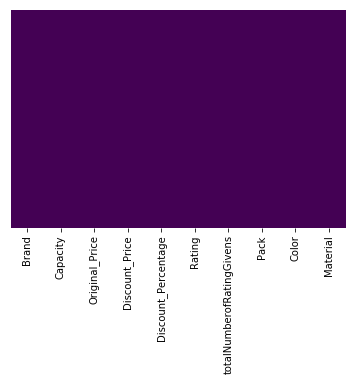

In [245]:
# Check if there are any null value or not

# to check missing value
sns.heatmap(dfSaveData.isnull(), cbar=False, yticklabels=False, cmap='viridis')
# so visually we can see there is no null value

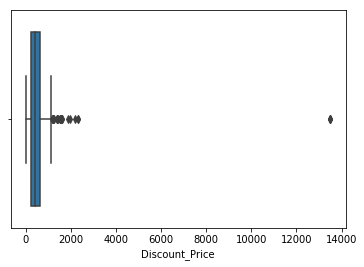

In [249]:
#Ploting boxplot to see is their any outlier 
sns.boxplot(x=dfSaveData.Discount_Price)
# we can see there are outlier in Discount Price

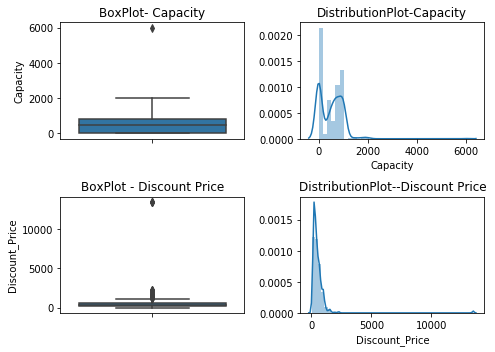

In [251]:

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,5))
axes[0,0].set_title('BoxPlot- Capacity')
axes[0,1].set_title('DistributionPlot-Capacity')
axes[1,0].set_title('BoxPlot - Discount Price')
axes[1,1].set_title('DistributionPlot--Discount Price')

sns.boxplot(dfSaveData.Capacity, orient='v',ax=axes[0,0])
sns.distplot(dfSaveData.Capacity,ax=axes[0,1]) 
sns.boxplot(dfSaveData.Discount_Price, orient='v',ax=axes[1,0])
sns.distplot(dfSaveData.Discount_Price,ax=axes[1,1]) 

fig.tight_layout();  # this reduces the space in between the subplots

In [ ]:
# Here both the coulmns having outlier which we need to remve from dataset

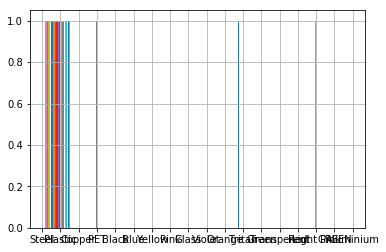

In [253]:
# Histogram for Brand
dfSaveData.Material.hist()

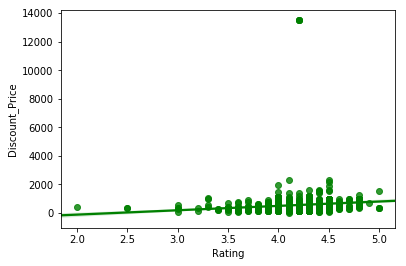

In [254]:
sns.regplot(x=dfSaveData.Rating, y=dfSaveData.Discount_Price, color='g')

In [255]:
dfFilData=dfSaveData[(dfSaveData.Rating>=3.5) & (dfSaveData.Discount_Price <2000)]
#dfSaveData['Material']=np.where(dfSaveData['Material'].isnull()==True ,'Plastic',dfSaveData['Material'].str.strip())

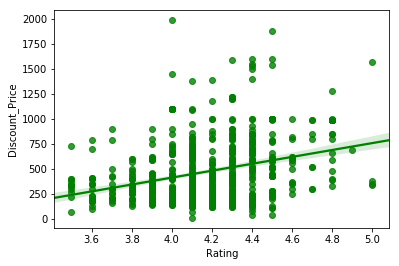

In [256]:
sns.regplot(x=dfFilData.Rating, y=dfFilData.Discount_Price, color='g')

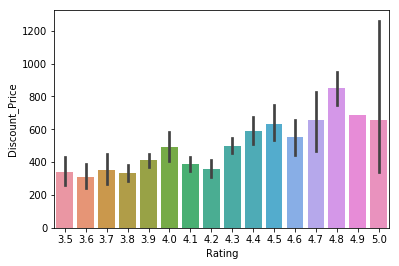

In [260]:
#bivariate analysis for independent variable being a brand and dependent variable being discount_price  a number
sns.barplot(x=dfFilData.Rating,y=dfFilData.Discount_Price)

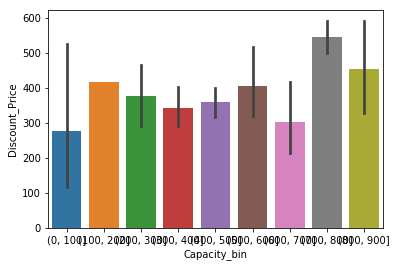

In [262]:
dfFilData['Capacity_bin']=pd.cut(dfFilData.Capacity,bins=[0,100,200,300,400,500,600,700,800,900])
sns.barplot(x=dfFilData.Capacity_bin,y=dfFilData.Discount_Price)

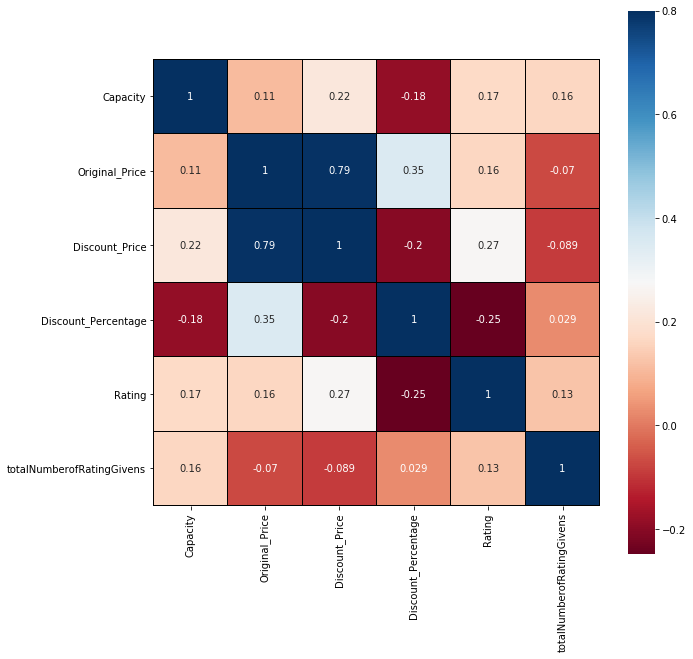

In [264]:
# Co-relation
corr=dfFilData.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')
# one variable influenced by other variable
# here Original Price and Discount Price are highly co-related so we can use any one of the column

In [ ]:
dfFilData.drop(['Capacity_bin'],axis=1,inplace=True)

In [274]:
#Best product based on rating >4.0 users can buy within budget of INR 200–400 and only consider the 1000 ml capacity
# with order price and rating

dfFilData[(dfFilData.Rating>=4.0) & (dfFilData.Discount_Price >=Min_price) & (dfFilData.Discount_Price<=Max_price) 
                    & (dfFilData.Capacity ==bottile_capacity)].sort_values(["Discount_Price","Rating"], ascending=(False,True))

#df.sort_values("Fare", ascending=False,inplace=True)


,Brand,Capacity,Original_Price,Discount_Price,Discount_Percentage,Rating,totalNumberofRatingGivens,Pack,Color,Material
600,HAANS,1000.0,1499.0,399.0,73.0,4.2,14442,Pack of 2,Green,Plastic
290,Lion,1000.0,699.0,395.0,43.0,4.4,30,Set of 6,Multicolor,Plastic
540,Cello,1000.0,484.0,379.0,21.0,4.1,1732,Pack of 1,Silver,Steel
712,Cello,1000.0,426.0,370.0,13.0,4.3,130,Set of 3,Multicolor,Plastic
50,ATMAN,1000.0,799.0,349.0,56.0,4.3,74,Set of 1,Multicolor,Plastic
376,Milton,1000.0,335.0,335.0,0.0,5.0,3,Blue,Silver,Steel
608,Cello,1000.0,444.0,321.0,27.0,4.1,262,Pack of 3,Multicolor,Plastic
606,ARDAKI,1000.0,599.0,300.0,49.0,4.6,7,Pack of 6,Red,Plastic
176,Luxuria,1000.0,300.0,299.0,0.0,4.0,54,Pack of 1,Clear,Steel
662,Milton,1000.0,485.0,289.0,40.0,4.0,90,Pack of 4,Red,PET
